# Scrap

In [9]:
%pip install seleniumbase
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  apparmor chromium-browser libfuse3-3 liblzo2-2 libudev1 snapd squashfs-tools systemd-hwe-hwdb
  udev
Suggested packages:
  apparmor-profiles-extra apparmor-utils fuse3 zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver libfuse3-3 liblzo2-2 snapd squashfs-tools
  systemd-hwe-hwdb udev
The following packages will be upgraded:
  libudev1
1 upgraded, 9 newly installed, 0 to remove and 48 not upgraded.
Need to get 30.2 MB of archives.
After this operation, 123 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 apparmor amd64 3.0.4-2ubuntu2.4 [598 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 liblzo2-2 amd64 2.10-2build3 [53.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 squashfs-tools amd64 1:4.5-3

In [3]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Créer une instance de Chrome en mode "undetected"
driver = uc.Chrome()

driver.get("https://courses.monoprix.fr/")

# Accepter la bannière cookies si présente
try:
    accept_cookies_btn = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, 'onetrust-accept-btn-handler'))
    )
    accept_cookies_btn.click()
    print("Bannière de cookies acceptée.")
except:
    print("Pas de bannière de cookies à accepter.")

# Cliquer sur "Se connecter"
element = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, "/html/body/div[1]/div/div[1]/main/div[1]/div[1]/a/div"))
)
element.click()

# Saisir l'e-mail
email_field = WebDriverWait(driver, 20).until(
    EC.presence_of_element_located((By.ID, 'email'))
)
email_field.click()
email_field.send_keys("2lowlay@tutamail.com")
time.sleep(2)

# Appuyer sur Entrée après la saisie de l'email
email_field.send_keys(Keys.ENTER)

# Attendre quelques secondes que la page se mette à jour
time.sleep(10)

print("URL après validation :", driver.current_url)
print("Récupération du mot de passe...")

try:
    password_field = WebDriverWait(driver, 30).until(
        EC.visibility_of_element_located((By.CSS_SELECTOR, 'input[type="password"]'))
    )
    password_field.click()
    password_field.send_keys("Lavague2120208!!")
    password_val = WebDriverWait(driver, 2).until(
        EC.visibility_of_element_located((By.XPATH, '//*[@id="__next"]/div/div/div/div[2]/div/form/button'))
    )
    password_val.click()
    print("Le champ mot de passe a été trouvé et rempli.")
except:
    print("Le champ mot de passe n'a pas été trouvé.")

# Attendre que la page principale soit chargée après connexion
time.sleep(5)

# A ce stade, vous devriez être sur la page principale après la connexion.
# On va maintenant récupérer les liens des catégories.
try:
    # On attend l'apparition des liens de catégories
    categories_links = WebDriverWait(driver, 20).until(
        EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'a[data-test="root-category-link"]'))
    )
    categories_dict = {}

    for link in categories_links:
        href = link.get_attribute('href')
        category_id = href.split('/')[-1]
        category_name = link.text.strip()  # Le nom de la catégorie est le texte du lien
        categories_dict[category_name] = category_id

    print("Dictionnaire des catégories :", categories_dict)

except Exception as e:
    print("Impossible de récupérer les catégories :", e)


# Fermer le navigateur
driver.quit()




Bannière de cookies acceptée.
URL après validation : https://client.monoprix.fr/monoprix-plus/login
Récupération du mot de passe...
Le champ mot de passe a été trouvé et rempli.
Dictionnaire des catégories : {'Promotions': '3d423a4e-70eb-4d3b-8b86-f64a46097f8f', 'Noël': 'cd4de4d4-8910-4a7f-9740-097347cf310e', 'Mes marques Monoprix': 'cf99332a-fc5d-4264-b5a5-3301621023e7', 'Bio': '5b5c3312-5e79-47bf-b4ea-89a285e58d5c', 'La Halle': 'e520ef7a-cbe7-4603-b186-5ecd5feb76a9', 'Fruits & Légumes': '5671998e-3a4f-4eb5-af6f-1f8295463185', 'Produits Laitiers, Œufs et Fromages': 'aa4d679d-2d26-441d-8423-071878880b3a', 'Charcuterie et Traiteur': '0495e644-aada-4859-8e47-582982b74821', 'Boucherie et Volaille': '8037bfe4-1ac8-41d0-9d11-17e8d4dcafe7', 'Produits de la Mer': '2e63bc47-6a12-4dab-a3c6-00f02c5340a5', 'Pain et Viennoiserie': '10a31bca-8ebd-4e6f-92ff-6ae59ab38b3c', 'Surgelés': '6174c656-9e47-431f-bc5d-d80f6252805e', 'Epicerie Sucrée': 'bd800ae5-5dde-488d-b187-0d9578581d61', 'Epicerie Salée': 

In [4]:
len(categories_dict)

30

In [6]:
base_url = "https://courses.monoprix.fr/api/v5/products?category="
api_links_dict = {category_name: base_url + cat_id for category_name, cat_id in categories_dict.items()}

print("Dictionnaire des liens d'API:")
for category_name, link in api_links_dict.items():
    print(f"{category_name} : {link}")


Dictionnaire des liens d'API:
Promotions : https://courses.monoprix.fr/api/v5/products?category=3d423a4e-70eb-4d3b-8b86-f64a46097f8f
Noël : https://courses.monoprix.fr/api/v5/products?category=cd4de4d4-8910-4a7f-9740-097347cf310e
Mes marques Monoprix : https://courses.monoprix.fr/api/v5/products?category=cf99332a-fc5d-4264-b5a5-3301621023e7
Bio : https://courses.monoprix.fr/api/v5/products?category=5b5c3312-5e79-47bf-b4ea-89a285e58d5c
La Halle : https://courses.monoprix.fr/api/v5/products?category=e520ef7a-cbe7-4603-b186-5ecd5feb76a9
Fruits & Légumes : https://courses.monoprix.fr/api/v5/products?category=5671998e-3a4f-4eb5-af6f-1f8295463185
Produits Laitiers, Œufs et Fromages : https://courses.monoprix.fr/api/v5/products?category=aa4d679d-2d26-441d-8423-071878880b3a
Charcuterie et Traiteur : https://courses.monoprix.fr/api/v5/products?category=0495e644-aada-4859-8e47-582982b74821
Boucherie et Volaille : https://courses.monoprix.fr/api/v5/products?category=8037bfe4-1ac8-41d0-9d11-17e8d4

In [ ]:
# Création du dictionnaire final qui va contenir les produits par catégorie
category_products = {}

for category_name, link in api_links_dict.items():
    # Récupération de l'ID associé au nom, au cas où vous en ayez besoin
    cat_id = categories_dict[category_name]
    print(f"Récupération des produits pour la catégorie: {category_name} ({cat_id})")
    response = requests.get(link)

    if response.status_code == 200:
        data = response.json()
        on_offer_products = []
        group_products = []

        # Vérification de la présence de result.productGroups
        if "result" in data and "productGroups" in data["result"]:
            for pg in data["result"]["productGroups"]:
                if pg.get("type") == "on_offer":
                    on_offer_products.extend(pg.get("products", []))
                elif pg.get("type") == "group":
                    group_products.extend(pg.get("products", []))

        # Stockage des produits dans le dictionnaire final sous le nom de la catégorie
        category_products[category_name] = {
            "on_offer": on_offer_products,
            "group": group_products
        }
    else:
        print(f"La requête pour la catégorie {cat_id} ({category_name}) a échoué avec le code :", response.status_code)

# Pour tester le résultat sur la première catégorie :
if categories_dict:
    some_category_name = next(iter(categories_dict))
    print("Catégorie :", some_category_name)
    print("Produits on_offer :", category_products[some_category_name]["on_offer"])
    print("Produits group :", category_products[some_category_name]["group"])


Récupération des produits pour la catégorie: Promotions (3d423a4e-70eb-4d3b-8b86-f64a46097f8f)
Récupération des produits pour la catégorie: Noël (cd4de4d4-8910-4a7f-9740-097347cf310e)
Récupération des produits pour la catégorie: Mes marques Monoprix (cf99332a-fc5d-4264-b5a5-3301621023e7)
Récupération des produits pour la catégorie: Bio (5b5c3312-5e79-47bf-b4ea-89a285e58d5c)
Récupération des produits pour la catégorie: La Halle (e520ef7a-cbe7-4603-b186-5ecd5feb76a9)
Récupération des produits pour la catégorie: Fruits & Légumes (5671998e-3a4f-4eb5-af6f-1f8295463185)
Récupération des produits pour la catégorie: Produits Laitiers, Œufs et Fromages (aa4d679d-2d26-441d-8423-071878880b3a)
Récupération des produits pour la catégorie: Charcuterie et Traiteur (0495e644-aada-4859-8e47-582982b74821)
Récupération des produits pour la catégorie: Boucherie et Volaille (8037bfe4-1ac8-41d0-9d11-17e8d4dcafe7)
Récupération des produits pour la catégorie: Produits de la Mer (2e63bc47-6a12-4dab-a3c6-00f02c

In [ ]:

print("Catégorie : Epicerie Salée")
print("Produits on_offer :", len(category_products["Epicerie Salée"]["on_offer"]))
print("Produits group :", len(category_products["Epicerie Salée"]["group"]))
#on à le meme nombre que ceux que j'avais manuellement compter

Catégorie : Epicerie Salée
Produits on_offer : 35
Produits group : 265


In [ ]:
#test de récupération avec une partie des identifiant produit
some_category_name = next(iter(category_products))

# On récupère une liste de quelques produits (on_offer + group)
all_products = category_products[some_category_name]["on_offer"] + category_products[some_category_name]["group"]

# Pour le test, on ne prend que quelques produits (par exemple 20, si disponibles)
test_products = all_products[:20]

# On construit la chaîne de caractères pour la requête
product_ids_str = ",".join(test_products)

# URL de la requête products/decorate
test_url = "https://courses.monoprix.fr/api/v5/products/decorate?productIds=" + product_ids_str

response = requests.get(test_url)
if response.status_code == 200:
    data = response.json()
    # On enregistre les données dans un fichier JSON
    with open("product_details.json", "w") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

    print("Données récupérées et enregistrées dans product_details.json")

else:
    print("Erreur lors de la requête:", response.status_code, response.text)


Données récupérées et enregistrées dans product_details.json


In [ ]:
print(data)

{'products': [{'productId': 'cc1ef203-11e2-4f2a-a64d-b28250978acd', 'retailerProductId': 'MPX_2638867', 'name': 'Président Beurre Gastronomique doux 82% MG Plaquette 250g', 'available': True, 'maxQuantityReached': False, 'alternatives': [], 'price': {'current': {'amount': '2.99', 'currency': 'EUR'}, 'unit': {'label': 'fop.price.per.kg', 'current': {'amount': '11.96', 'currency': 'EUR'}}}, 'isInCurrentCatalog': True, 'isInProductList': False, 'categoryPath': ['Promotions', 'Les promos à ne pas manquer', 'Beurre Président, 50% sur le 2ème'], 'guaranteedProductLife': {'quantity': 3, 'unit': 'WEEK'}, 'brand': 'President', 'retailerFinancingPlanIds': [], 'image': {'src': 'https://courses.monoprix.fr/images-v3/0c44253f-c4a3-4340-9d37-d41e42b9d14a/60ab82de-75bc-45b2-ade5-d9a3016b64d3/300x300.jpg', 'description': 'Président Beurre Gastronomique doux 82% MG Plaquette 250g', 'fopSrcset': 'https://courses.monoprix.fr/images-v3/0c44253f-c4a3-4340-9d37-d41e42b9d14a/60ab82de-75bc-45b2-ade5-d9a3016b6

In [ ]:
import requests
import json
import time
import os

# Suppose que category_products est déjà défini, par exemple :
# category_products = {
#     "Pain et Viennoiserie": {
#         "on_offer": ["id1", "id2", ...],
#         "group": ["id3", "id4", ...]
#     },
#     "Fruits et Légumes": {
#         "on_offer": [...],
#         "group": [...]
#     },
#     ...
# }

base_url = "https://courses.monoprix.fr/api/v5/products/decorate?productIds="
batch_size = 20  # Nombre de produits par requête
pause_duration = 2  # Pause de 2 secondes entre chaque requête

# Créer un dossier pour stocker les résultats si nécessaire
output_dir = "product_details_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for category_name, products_dict in category_products.items():
    # Récupération de tous les produits (on_offer + group)
    all_products = products_dict["on_offer"] + products_dict["group"]

    # Parcours des produits par batch de taille max batch_size
    for i in range(0, len(all_products), batch_size):
        batch_products = all_products[i:i+batch_size]
        product_ids_str = ",".join(batch_products)

        # URL de la requête
        test_url = base_url + product_ids_str
        response = requests.get(test_url)

        if response.status_code == 200:
            data = response.json()

            # Nom de fichier JSON (par ex : product_details_Pain et Viennoiserie_0.json)
            batch_index = i // batch_size
            safe_category_name = category_name.replace(" ", "_").replace("/", "_")  # Pour éviter les problèmes de nommage
            filename = f"product_details_{safe_category_name}_{batch_index}.json"
            filepath = os.path.join(output_dir, filename)

            with open(filepath, "w", encoding="utf-8") as f:
                json.dump(data, f, ensure_ascii=False, indent=4)

            print(f"Données récupérées pour {category_name}, batch {batch_index} et enregistrées dans {filename}")
        else:
            print(f"Erreur lors de la requête pour {category_name} (batch {i//batch_size}):", response.status_code, response.text)

        # Pause entre les requêtes pour éviter de surcharger le serveur
        time.sleep(pause_duration)


Données récupérées pour Promotions, batch 0 et enregistrées dans product_details_Promotions_0.json
Données récupérées pour Promotions, batch 1 et enregistrées dans product_details_Promotions_1.json
Données récupérées pour Promotions, batch 2 et enregistrées dans product_details_Promotions_2.json
Données récupérées pour Promotions, batch 3 et enregistrées dans product_details_Promotions_3.json
Données récupérées pour Promotions, batch 4 et enregistrées dans product_details_Promotions_4.json
Données récupérées pour Promotions, batch 5 et enregistrées dans product_details_Promotions_5.json
Données récupérées pour Promotions, batch 6 et enregistrées dans product_details_Promotions_6.json
Données récupérées pour Promotions, batch 7 et enregistrées dans product_details_Promotions_7.json
Données récupérées pour Promotions, batch 8 et enregistrées dans product_details_Promotions_8.json
Données récupérées pour Promotions, batch 9 et enregistrées dans product_details_Promotions_9.json
Données ré

# look into the data

In [1]:
import pandas as pd
df = pd.read_csv('/Users/lml/Documents/Golem/scripts/price_comparator/monoprix-dashboard/public/products_data_V2.csv')
df.head()

,main_category,productId,retailerProductId,name,price_eur,price_per_kg_eur,categoryPath,brand,available,maxQuantityReached,featured,guaranteed_life_quantity,guaranteed_life_unit,size_value,attributes_labels,image_src
0,Animaux,0fe77782-bec5-4fa2-ab53-3aa047fcee33,MPX_3859604,Purina One Croquettes pour Chien Mini -10kg Co...,7.09,4.73,"['Animaux', 'Chien', 'Croquettes', 'Petits Chi...",Purina,True,False,False,1.0,MONTH,1.5kg,[],https://courses.monoprix.fr/images-v3/0c44253f...
1,Animaux,40735017-b24c-468f-8220-f818184aaba0,MPX_2753156,Catsan Litière Minérale Agglomérante Pour Chat 5L,6.29,1.26,"['Animaux', 'Chat', 'Litière']",Catsan,True,False,False,NaN,NaN,5L,[],https://courses.monoprix.fr/images-v3/0c44253f...
2,Animaux,c51ae972-f368-412d-91d4-c9744f462c10,MPX_2482411,Catsan Hygiène Plus Litière Minérale Pour Chat...,7.59,1.57,"['Animaux', 'Chat', 'Litière']",Catsan,True,False,False,1.0,YEAR,4.844kg,[],https://courses.monoprix.fr/images-v3/0c44253f...
3,Animaux,023aa724-7ce8-4804-aef9-c1a362e87e80,MPX_4220143,Sheba Filets Au Poulet Et Au Thon Msc Pour Cha...,1.59,26.50,"['Animaux', 'Chat', 'Boites et Barquettes', 'S...",Sheba,True,False,False,6.0,MONTH,60g,[],https://courses.monoprix.fr/images-v3/0c44253f...
4,Animaux,fb864f52-c4d9-48eb-99df-dba306aaa12d,MPX_4215344,Sheba Filets Les Effilés de Poulet pour chat a...,1.59,26.50,"['Animaux', 'Chat', 'Boites et Barquettes', 'S...",Sheba,True,False,False,6.0,MONTH,60g,[],https://courses.monoprix.fr/images-v3/0c44253f...


In [3]:
df.columns

Index(['main_category', 'productId', 'retailerProductId', 'name', 'price_eur',
       'price_per_kg_eur', 'categoryPath', 'brand', 'available',
       'maxQuantityReached', 'featured', 'guaranteed_life_quantity',
       'guaranteed_life_unit', 'size_value', 'attributes_labels', 'image_src'],
      dtype='object')

In [9]:
def transform_categories(df):
    df['suffix'] = df['main_category'].str.split('_').str[1]
    df['main_category'] = df['main_category'].str.split('_').str[0]
    
    # Update categoryPath where suffix exists
    mask = df['suffix'].notna()
    df.loc[mask, 'categoryPath'] = df.loc[mask].apply(
        lambda x: eval(x['categoryPath']) + [x['suffix']], axis=1
    )
    
    # Drop temporary suffix column
    df = df.drop('suffix', axis=1)
    
    return df

# Apply transformation
df_curated = transform_categories(df)
df_curated.to_csv("products_v2_curated.csv", Index=False)


(26903, 16)

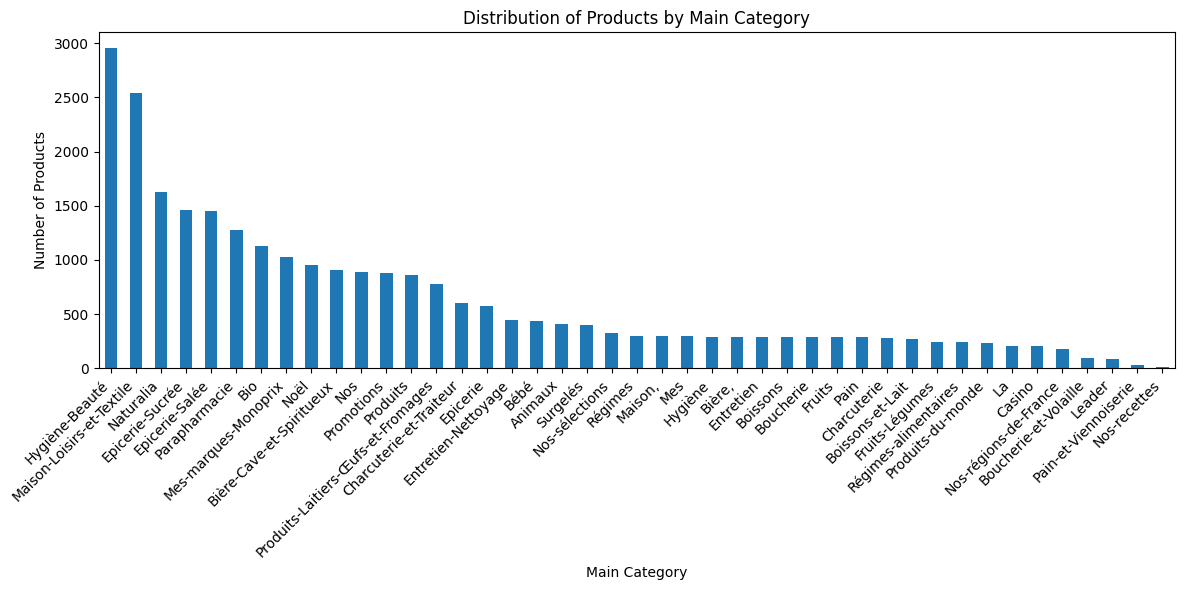

In [5]:
# Create a bar plot of the main category distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_curated['main_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Products by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [7]:
df.columns

Index(['main_category', 'productId', 'retailerProductId', 'name', 'price_eur',
       'price_per_kg_eur', 'categoryPath', 'brand', 'available',
       'maxQuantityReached', 'featured', 'guaranteed_life_quantity',
       'guaranteed_life_unit', 'size_value', 'attributes_labels', 'image_src'],
      dtype='object')